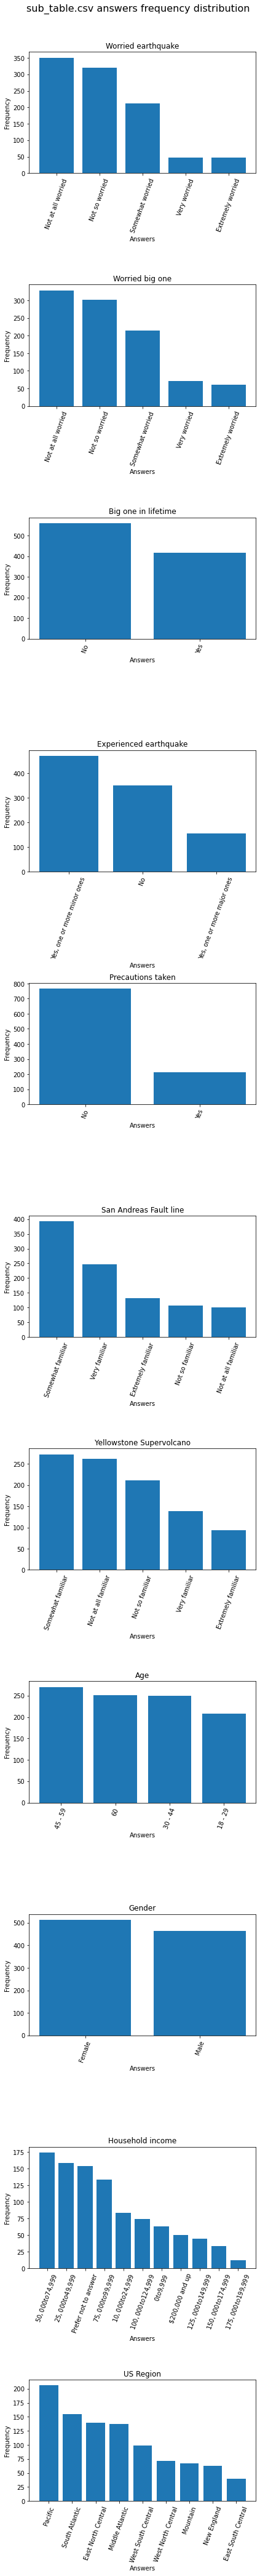

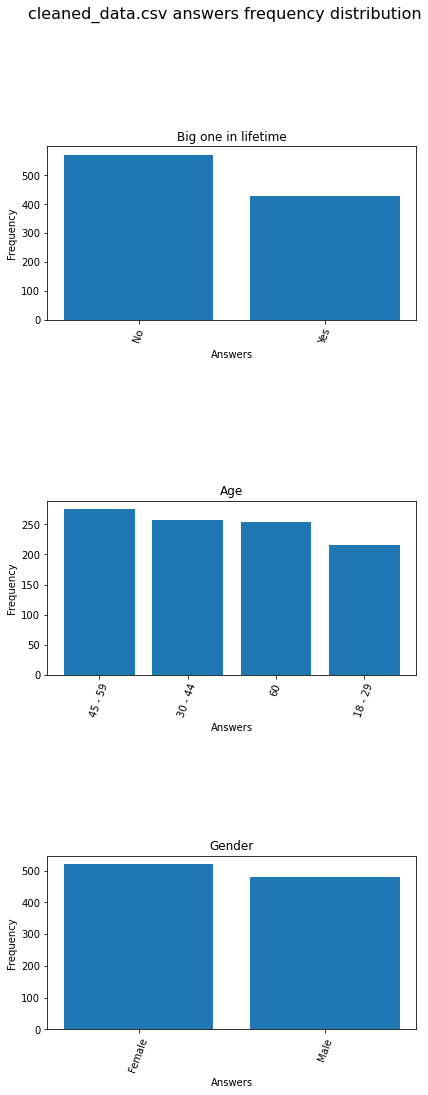

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

original_data_path="../Original_Data/earthquake_data.csv"
cleaned_data_path="../Analysis_Data/cleaned_data.csv"
subtable_path="../Analysis_Data/sub_table.csv"
data_appendix_path="../Documents/Data_Appendix.txt"

original_df = pd.read_csv(original_data_path)
cleaned_df = pd.read_csv(cleaned_data_path)
subtable_df = pd.read_csv(subtable_path)

# Get list of original variable names
original_variables = list(original_df)

# txt will store text to be saved in data appendix
txt = "cleaned_data.csv appendix\n\n"
# txt2 will store data about subtable_df which will be added to variable txt
txt2 = ""

# Subplots showing frequency distribution of
# answers in cleaned_df
fig1, axs1 = plt.subplots(11,1)
fig1.set_size_inches((10,60))
fig1.tight_layout(pad=16.0)
fig1.suptitle("sub_table.csv answers frequency distribution", fontsize=16)

# Subplots showing frequency distribution of
# answers in subtable_df
fig2, axs2 = plt.subplots(3,1)
fig2.set_size_inches((10,17))
fig2.tight_layout(pad=16.0)
fig2.suptitle("cleaned_data.csv answers frequency distribution", fontsize=16)
j = 0  # counter of axs2 

for i, col in enumerate(cleaned_df):
    counts = cleaned_df[col].value_counts().to_dict()
    original_count = original_df[original_variables[i]].count()
    txt += f"Variable: {col}\nName in original dataset: {original_variables[i]}\nTotal count: {cleaned_df[col].count()}\nTotal count in original file: {original_count}\nFrequency of answers: {counts}\n\n"
    
    answers, freq = list(counts.keys()), list(counts.values())
    answers_idx = [idx+1 for idx in range(len(answers))]
    axs1[i].bar(answers_idx, freq, align="center", tick_label=answers)
    axs1[i].set_title(col)
    axs1[i].set_xlabel("Answers")
    axs1[i].set_ylabel("Frequency")
    axs1[i].set_xticklabels(answers,rotation=70)
    
    if col in ["Age", "Gender", "Big one in lifetime"]:
        counts = subtable_df[col].value_counts().to_dict()
        answers, freq = list(counts.keys()), list(counts.values())
        answers_idx = [idx+1 for idx in range(len(answers))]
        axs2[j].bar(answers_idx, freq, align="center", tick_label=answers)
        axs2[j].set_title(col)
        axs2[j].set_xlabel("Answers")
        axs2[j].set_ylabel("Frequency")
        axs2[j].set_xticklabels(answers,rotation=70)
        j += 1
        txt2 += f"Variable:{col}\nName in original dataset: {original_variables[i]}\nTotal count: {subtable_df[col].count()}\nTotal count in original file: {original_count}\nFrequency of answers: {counts}\n\n"

# Save bar charts of both datasets
fig1.savefig("../Documents/cleaned_data_freq.png")
fig2.savefig("../Documents/sub_table_freq.png")

separator = 100*"="
txt += f"\n\n{separator}\n\n\n\n"
txt += "sub_table.csv appendix\n\n"
txt += txt2

with open(data_appendix_path, "w") as f:
    f.write(txt)